## Deliverables in Proposal


### 1 Must accomplish
1) Apply explanatory data analysis on the raw data <br>
2) Text preprocessing(Noise Removal, Lexicon Normalization,Object Standardization etc.) and get tokenization of tweet text, then analyze the processed data and plot Word Clouds.<br>
3) Apply one or two simple machine learning techniques (Naive Bayes, Logistic regression, SVM, etc.) to the data and see how they perform.<br>


### 2 Expect to accomplish
1) Extract and generate features from the preprocessed text (word frequencies, parts of speech tags, opinion words and phrases, etc.), then transform the text into a document term matrix. <br>
2) Apply more advanced models (LSTM, Proximity Model, Voting Model, etc.).<br>
3) Evaluate the performance and predictions of the trained models(Confusion Matrix, AUC, ROC curve) <br>


### 3 Would like to accomplish
1) Discuss the difference and synonyms of different machine learning techniques <br>
2) Try to enhance the performance of model (ensemble models or other methods) <br>
3) Make a prediction using out of sample data and analyze the results <br>


## Dataset Analysis
In this section, we will apply explanatory data analysis on the raw data, including visualization, hashtag analysis.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yingchenghan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('dataset.csv', index_col = 'Unnamed: 0')
print(dataset.shape)

(24783, 6)


In [3]:
dataset.index=[np.arange(24783)]

In [4]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
y=dataset['class'].values
y
## 0:hate speech; 1:offensive language; 2:neither

array([2, 1, 1, ..., 1, 1, 2])

In [6]:
dataset['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

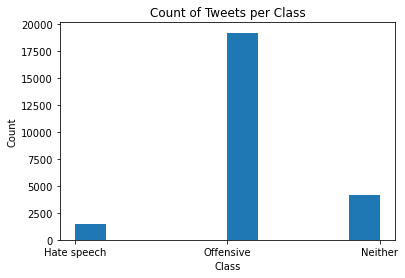

In [7]:
plt.hist(dataset['class'],align='mid')
col_names=['Hate speech','Offensive',"Neither"]
x_values = np.arange(0, len(col_names))
plt.xticks(x_values, col_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Tweets per Class')
plt.show()

(-0.5, 499.5, 399.5, -0.5)

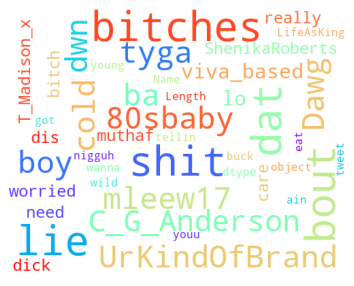

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# optional: could use mask images
# import mask image
#mask = np.array(Image.open('comment.png'))

# set stopwords
sw = set(STOPWORDS)
sw.add("RT")

# offensive language wordcloud
wc_offensive = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

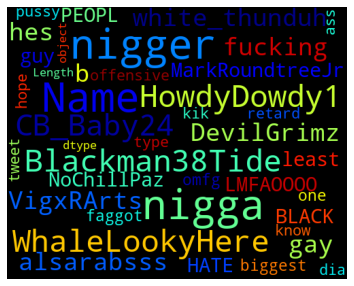

In [9]:
# hate speech wordcloud
wc_hate = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'black',
    colormap = 'jet',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==0].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_hate)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

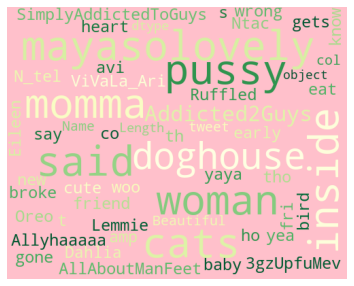

In [10]:
# neither wordcloud
wc_neither = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'pink',
    colormap = 'YlGn',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==2].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_neither)
plt.axis("off")

In [11]:
# collect hashtags
def collect_hashtags(tweet):
    hts = []
    for i in tweet:
        ht = re.findall(r"#[a-zA-Z]+",i)
        hts.append(ht)
    return hts

In [12]:
# hashtags from different kinds of tweets
ht_off = collect_hashtags(dataset['tweet'][dataset['class']==1])
ht_hate = collect_hashtags(dataset['tweet'][dataset['class']==0])
ht_neither = collect_hashtags(dataset['tweet'][dataset['class']==2])

In [13]:
ht_off = sum(ht_off,[])
ht_hate = sum(ht_hate,[])
ht_neither = sum(ht_neither,[])

In [14]:
freq_off = nltk.FreqDist(ht_off)
df_off = pd.DataFrame(
    {
        'Hashtag':list(freq_off.keys()),
        'Number':list(freq_off.values())
    }
)

In [15]:
freq_hate = nltk.FreqDist(ht_hate)
df_hate = pd.DataFrame(
    {
        'Hashtag':list(freq_hate.keys()),
        'Number':list(freq_hate.values())
    }
)

In [16]:
freq_neither = nltk.FreqDist(ht_neither)
df_neither = pd.DataFrame(
    {
        'Hashtag':list(freq_neither.keys()),
        'Number':list(freq_neither.values())
    }
)

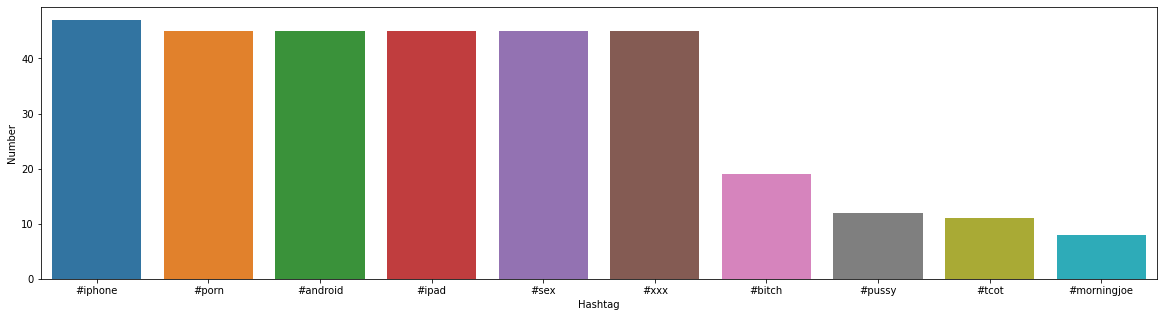

In [17]:
import seaborn as sns
# pick 10 most frequently used hashtags in each class
df_off = df_off.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_off, x= "Hashtag", y = "Number")
plt.show()

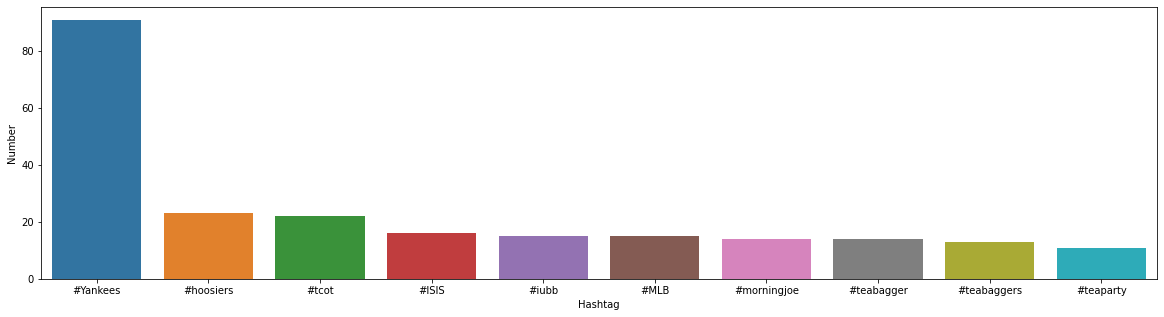

In [18]:
import seaborn as sns
df_neither = df_neither.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_neither, x= "Hashtag", y = "Number")
plt.show()

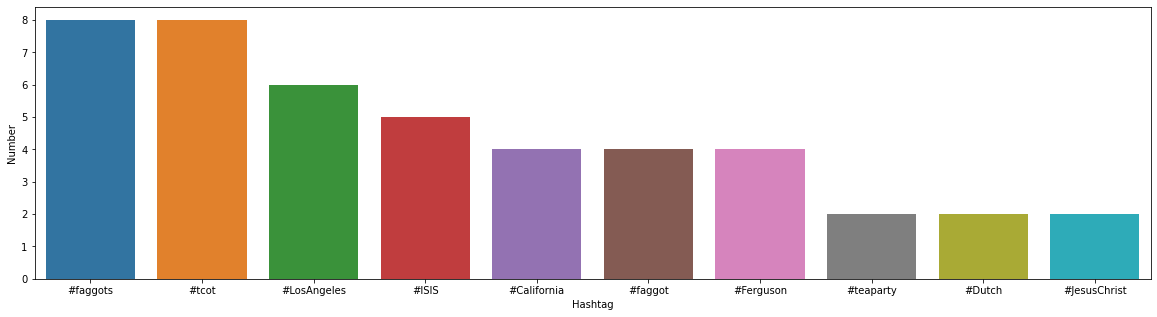

In [19]:
import seaborn as sns
df_hate = df_hate.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_hate, x= "Hashtag", y = "Number")
plt.show()

We can see from the graphs that approximately only half of the terms clearly reflect the offensive, hate, or neither offensive nor hate languages. So perhaps hashtags should be removed in the following data cleaning step since they do not contain much useful information.

## Preprocess

In [20]:
# data cleaning
stemmer = nltk.PorterStemmer()
stopword = set(stopwords.words('english'))
new_tweet=[]
import string

def data_preprocess(review):
    review = re.sub(r"http\S+", '', review) # remove url
    review = re.sub(r'^\s+|\s+?$','',review) # remove leading and trailing whitespace
    review = re.sub(r'@[\w\-]+', '', review) # remove mentions
    review = re.sub(r'RT[\s]+', '', review) #remove retweet text 'RT'
    review = re.sub('[^a-zA-Z]',' ',review)#replace non-character with space
    review = review.lower() #lower the text
    review = re.sub('\[.*?\]', '', review)
    #review = re.sub('https?://\S+|www\.\S+', '', review) # remove hyperlinks
    review = re.sub(r'#', '', review) # remove hashtags
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) # remove escape characters
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in stopword and word not in string.punctuation] #remove stopwords and punctuations and tokenize
    review=" ".join(review)
    review = [stemmer.stem(word) for word in review.split(' ')] #use PorterStemmer
    
    review=" ".join(review)
    if review != "":
        new_tweet.append(review)
    return review

In [21]:
dataset['processed_tweet'] = dataset['tweet'].apply(data_preprocess)

In [22]:
dataset.dropna(axis=0, how = "any", inplace = True)

In [23]:
dataset[['tweet','processed_tweet']].head()

,tweet,processed_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [24]:
dataset.to_csv('preprocessed_data.csv')

In [25]:
dataset['processed_tweet'][0]

'woman complain clean hous amp man alway take trash'

In [26]:
dataset[dataset['class']==0]['processed_tweet']

85                                            queer gaywad
89                alsarabsss he beaner smh tell he mexican
110          fuck gay blacklist hoe hold tehgodclan anyway
184           lmfaoooo hate black peopl black peopl nigger
202                                     least nigger lmfao
                               ...                        
24576                              guy biggest faggot omfg
24685    one name offens kike wop kraut wetback jigaboo...
24751                           pussi ass nigga know nigga
24776                                               nigger
24777    retard hope get type diabet die sugar rush fuc...
Name: processed_tweet, Length: 1430, dtype: object

In [27]:
length=[]
for j in range(3):
    length.append([len(i.split()) for i in dataset[dataset['class']==j]['processed_tweet']])
mean_length = np.array([np.mean(i) for i in length])
var_length = np.array([np.var(i) for i in length])
max_length = np.array([np.max(i) for i in length])
min_length = np.array([np.min(i) for i in length])
cnt = np.array([len(i) for i in length])

words_description = pd.DataFrame([cnt, max_length,min_length,mean_length, var_length], 
                                 columns=['class_0','class_1','class_2'], index=['count','max','min','mean','variance'] )
words_description

,class_0,class_1,class_2
count,1430.000000,19190.000000,4163.000000
max,22.000000,27.000000,28.000000
min,1.000000,0.000000,0.000000
mean,7.519580,7.245076,8.081672
variance,16.923742,14.169485,15.421627


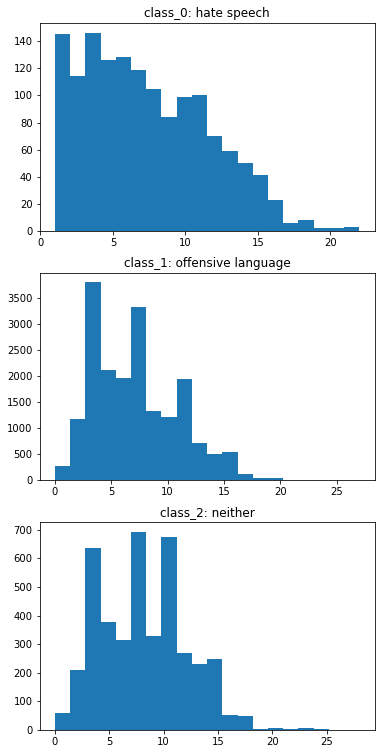

In [28]:
fig = plt.figure(figsize=(6,13))
ax1 = fig.add_subplot(311)
ax1.hist(length[0],bins=20)
ax1.set_title('class_0: hate speech')
ax2 = fig.add_subplot(312)
ax2.hist(length[1],bins=20)
ax2.set_title('class_1: offensive language')
ax3 = fig.add_subplot(313)
ax3.hist(length[2],bins=20)
ax3.set_title('class_2: neither')
plt.show()
## 0:hate speech; 1:offensive language; 2:neither

From the above graph, we can conclude that hate speech is always shorter then speech which is less offensive.

In [29]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sentimentanalyzer
import nltk
nltk.download('vader_lexicon')

sentiment_analyzer = sentimentanalyzer()

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features_0 = sentiment_analysis_array(dataset[dataset['class']==0]['processed_tweet'])
new_features_0 = pd.DataFrame({'Neg':sentiment_features_0[:,0],'Pos':sentiment_features_0[:,1],'Neu':sentiment_features_0[:,2],'Compound':sentiment_features_0[:,3]})

sentiment_features_1 = sentiment_analysis_array(dataset[dataset['class']==1]['processed_tweet'])
new_features_1 = pd.DataFrame({'Neg':sentiment_features_1[:,0],'Pos':sentiment_features_1[:,1],'Neu':sentiment_features_1[:,2],'Compound':sentiment_features_1[:,3]})

sentiment_features_2 = sentiment_analysis_array(dataset[dataset['class']==2]['processed_tweet'])
new_features_2 = pd.DataFrame({'Neg':sentiment_features_2[:,0],'Pos':sentiment_features_2[:,1],'Neu':sentiment_features_2[:,2],'Compound':sentiment_features_2[:,3]})

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yingchenghan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
new_features_0.mean(axis=0)

Neg         0.417263
Pos         0.097264
Neu         0.485474
Compound   -0.414497
dtype: float64

In [31]:
new_features_1.mean(axis=0)

Neg         0.376837
Pos         0.122483
Neu         0.500629
Compound   -0.348878
dtype: float64

In [32]:
new_features_2.mean(axis=0)

Neg         0.082956
Pos         0.144369
Neu         0.772437
Compound    0.075039
dtype: float64

From above above results, we can conclude that hate speech contains more begative words than speech which is less offensive.

## Visualization for Comparsion

(-0.5, 499.5, 399.5, -0.5)

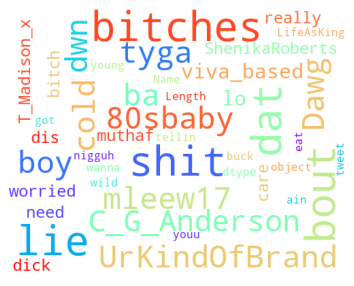

In [33]:
wc_offensive_new = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive_new)
plt.axis("off")

## Data Augmentation

### by EDA
refer to EMNLP-IJCNLP paper EDA: Easy Data Augmentation techniques for boosting performance on text classification tasks.<br>
see this [repository](https://github.com/jasonwei20/eda_nlp)

### by Translating
refer to this [repository](https://github.com/kothiyayogesh/medium-article-code/tree/master/How%20I%20dealt%20with%20Imbalanced%20text%20dataset)
* Issues about google_trans<br>
1) pip install google_trans_new <br>
2) then change the line 151 and line 233 in google_trans_new/google_trans_new.py: <br>
response = (decoded_line + ']') <br>
to <br>
response = (decoded_line) # Note the Brackets shall be added <br>
3) if it cannot work on the terminal, change the line 8 in google_trans_new/google_trans_new.py: <br>
from .constant import LANGUAGES, DEFAULT_SERVICE_URLS <br>
to <br>
from constant import LANGUAGES, DEFAULT_SERVICE_URLS <br>
* Note <br>
429 error occurs here, further work is needed.

In [34]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet,processed_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


## Embedding

In [36]:
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=3600)
cv=cv.fit_transform(dataset['processed_tweet'])
cv_features = cv.toarray()

In [37]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweet'])
tfidf_features = tfidf.toarray()

In [38]:
#Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["processed_tweet"].apply(lambda x: x.split(" ")))]

# training of the model
doc2vec_model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

# transform each document (tweet) into a vector data
doc2vec_features = dataset["processed_tweet"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_features.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_features.columns]

In [39]:
doc2vec_features

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.094642,0.107251,0.078986,-0.040068,-0.024810
1,0.118723,0.125201,-0.040313,-0.028260,0.012862
2,-0.101500,-0.011993,-0.061495,-0.049737,0.039967
3,0.067333,0.060064,0.071523,-0.088429,0.039696
4,0.104231,0.143081,-0.056282,-0.036291,-0.041535
...,...,...,...,...,...
24778,0.077478,0.126461,-0.058496,0.177877,-0.106190
24779,0.013949,0.069144,0.008253,-0.032812,0.039352
24780,0.105570,-0.031420,-0.116263,0.028228,0.030614
24781,-0.002365,0.180401,-0.022560,0.042319,0.028444


In [40]:
#sentiment analysis features
sa_features = pd.concat([new_features_0,new_features_1,new_features_2], ignore_index=True)
sa_features

,Neg,Pos,Neu,Compound
0,0.000,0.000,1.000,0.0000
1,0.277,0.000,0.723,-0.3182
2,0.368,0.000,0.632,-0.5423
3,0.615,0.000,0.385,-0.8402
4,0.000,0.874,0.126,0.7871
...,...,...,...,...
24778,0.000,0.333,0.667,0.4588
24779,0.000,0.776,0.224,0.9460
24780,0.000,0.000,1.000,0.0000
24781,0.496,0.000,0.504,-0.7096


In [41]:
total_features = np.concatenate([pd.DataFrame(cv_features),pd.DataFrame(tfidf_features),sa_features,doc2vec_features],axis=1)

In [42]:
total_features = pd.DataFrame(total_features)
total_features

,0,1,2,3,4,5,6,7,8,9,...,10040,10041,10042,10043,10044,10045,10046,10047,10048,10049
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,1.000,0.0000,0.094642,0.107251,0.078986,-0.040068,-0.024810
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.277,0.000,0.723,-0.3182,0.118723,0.125201,-0.040313,-0.028260,0.012862
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.368,0.000,0.632,-0.5423,-0.101500,-0.011993,-0.061495,-0.049737,0.039967
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.615,0.000,0.385,-0.8402,0.067333,0.060064,0.071523,-0.088429,0.039696
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.874,0.126,0.7871,0.104231,0.143081,-0.056282,-0.036291,-0.041535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.333,0.667,0.4588,0.077478,0.126461,-0.058496,0.177877,-0.106190
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.776,0.224,0.9460,0.013949,0.069144,0.008253,-0.032812,0.039352
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,1.000,0.0000,0.105570,-0.031420,-0.116263,0.028228,0.030614
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.496,0.000,0.504,-0.7096,-0.002365,0.180401,-0.022560,0.042319,0.028444


We got 4 kinds of features of texts, including CountVectorizer(TF), TF-IDF, doc2vec and sentimental analysis for following classifers.

## Train and Test Split

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_features, y, test_size = 0.1, random_state=0)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, y, test_size = 0.1, random_state=0)
X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(doc2vec_features, y, test_size = 0.1, random_state=0)
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(sa_features, y, test_size = 0.1, random_state=0)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(total_features, y, test_size = 0.1, random_state=0)

#X_train_cv.shape, X_test_cv.shape
splited_data= [(X_train_cv,y_train_cv,X_test_cv, y_test_cv), (X_train_sa,y_train_sa,X_test_sa, y_test_sa),\
              (X_train_tfidf,y_train_tfidf,X_test_tfidf, y_test_tfidf), (X_train_d2v,y_train_d2v,X_test_d2v, y_test_d2v),\
              (X_train_total,y_train_total,X_test_total, y_test_total)]

## Classifiers

In the following section, we will apply different clasdifiers: Decision Tree, Naive Bays, Logistic Regression and Support Vector Machine, to different features to see which performs best. The evalution metrics inlude accuracy, precision, recall rate and f1.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn
feature_list = ['count vector', "sentimental analysis", "tf-idf", "doc2vec", "combination"]

def result_evaluation(cm, y_test, pred, index, title):
    matrix_proportions = np.zeros((3,3))
    for i in range(0,3):
        matrix_proportions[i,:] = cm[i,:]/float(cm[i,:].sum())
    names=['Hate','Offensive','Neither']
    confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
    plt.rcParams['figure.figsize'] = [15,10]
    ax = plt.subplot(2, 3, index+1)
    ax = seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
    ax.set_title(title)
    
    metrics_table['Accuracy score'].append(accuracy_score(y_test, pred))
    metrics_table['Precision score'].append(precision_score(y_test, pred,average='weighted'))
    metrics_table['Recall score'].append(recall_score(y_test, pred,average='weighted'))
    metrics_table["f1 score"].append(f1_score(y_test, pred,average='weighted'))    

### 1. Decision Tree

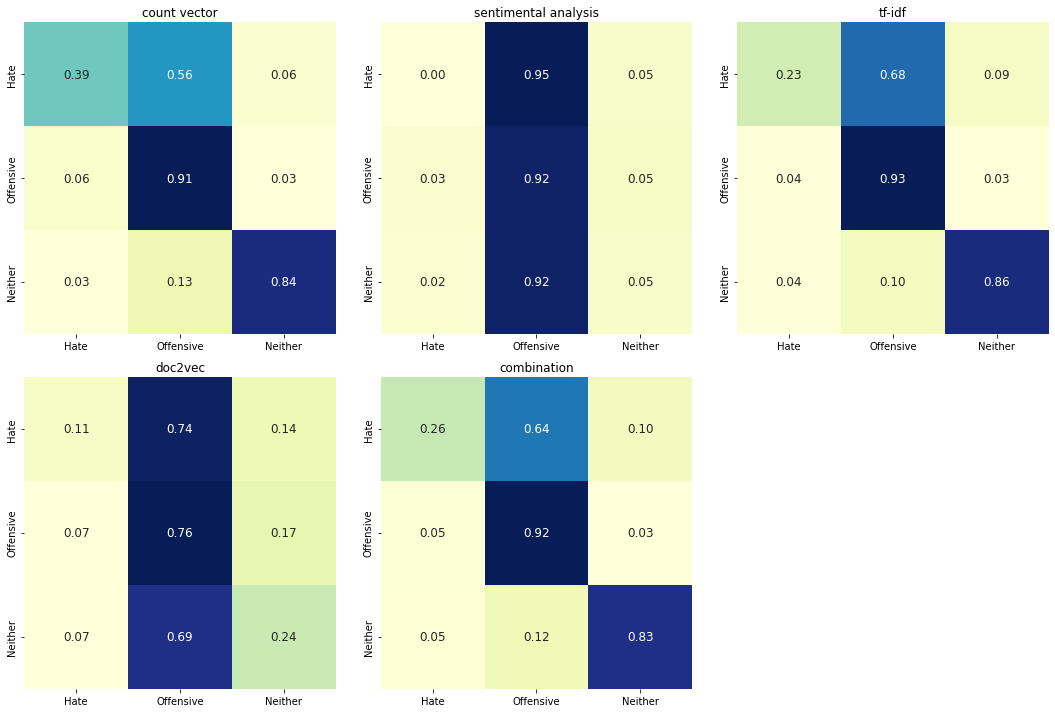

,Accuracy score,Precision score,Recall score,f1 score
count vector,0.866075,0.878244,0.866075,0.871666
sentimental analysis,0.722469,0.629634,0.722469,0.666663
tf-idf,0.881807,0.874898,0.881807,0.878108
doc2vec,0.637757,0.655652,0.637757,0.646366
combination,0.869302,0.870010,0.869302,0.869651


In [48]:
from sklearn.tree import DecisionTreeClassifier

metrics_table = {
    'Accuracy score':[],
    'Precision score':[],
    'Recall score':[],
    'f1 score':[]
}

for i in range(len(splited_data)):
    data = splited_data[i]
    classifier = DecisionTreeClassifier()
    classifier.fit(data[0], data[1])
    pred = classifier.predict(data[2])
    cm = confusion_matrix(data[3],pred)
    title = feature_list[i]
    result_evaluation(cm, data[3], pred, i, title)


plt.tight_layout()     
plt.show()  
metrics_table = pd.DataFrame(metrics_table, index = feature_list)
metrics_table

### 2. Logistic Regression

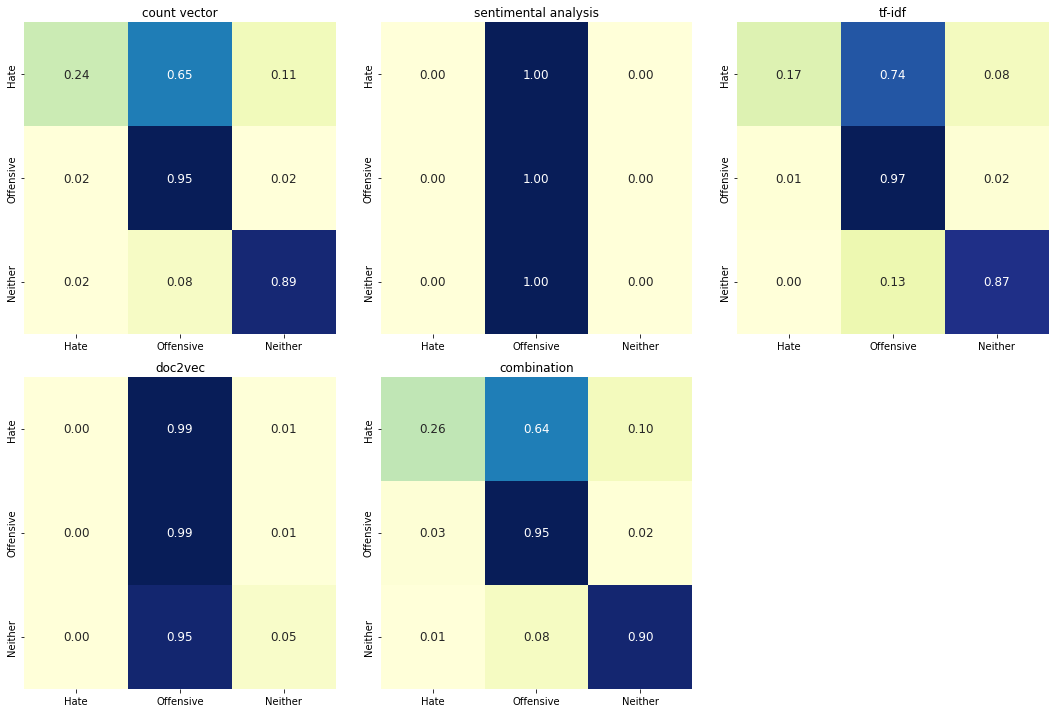

,Accuracy score,Precision score,Recall score,f1 score
count vector,0.900766,0.889251,0.900766,0.893795
sentimental analysis,0.777733,0.604869,0.777733,0.680494
tf-idf,0.904800,0.888897,0.904800,0.891536
doc2vec,0.781363,0.709728,0.781363,0.697776
combination,0.902380,0.892108,0.902380,0.896286


In [49]:
from sklearn.linear_model import LogisticRegression

metrics_table = {
    'Accuracy score':[],
    'Precision score':[],
    'Recall score':[],
    'f1 score':[]
}

for i in range(len(splited_data)):
    data = splited_data[i]
    classifier = LogisticRegression()
    classifier.fit(data[0], data[1])
    pred = classifier.predict(data[2])
    cm = confusion_matrix(data[3],pred)
    title = feature_list[i]
    result_evaluation(cm, data[3], pred, i, title)

plt.tight_layout()     
plt.show()  
metrics_table = pd.DataFrame(metrics_table, index = feature_list)
metrics_table

### 3. Naive Bayes

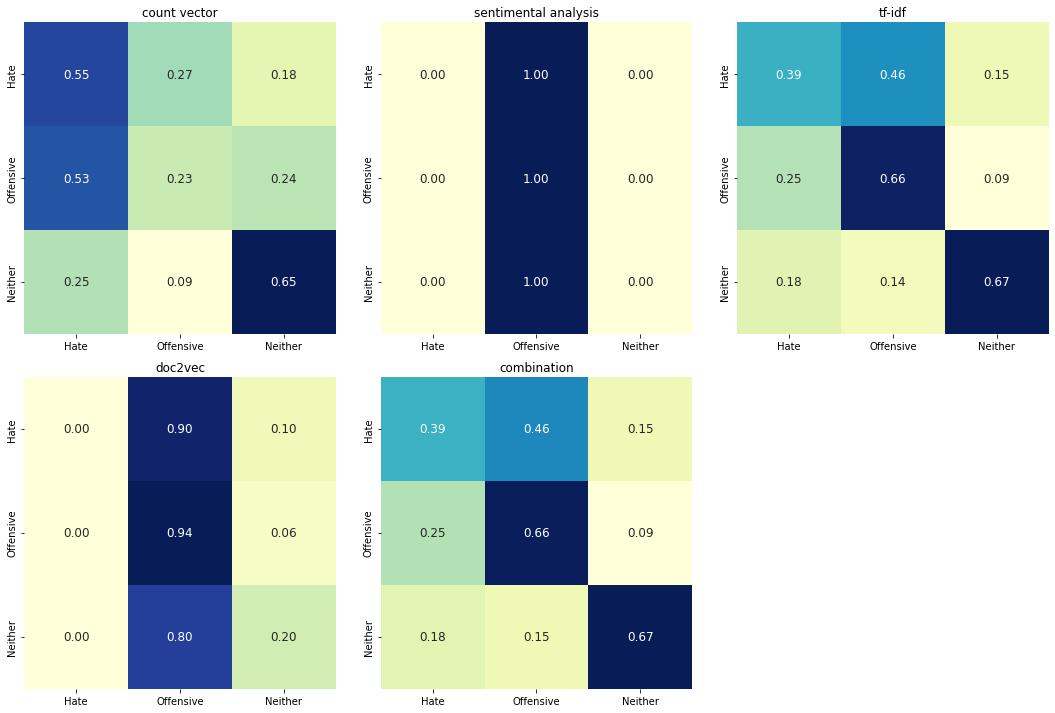

,Accuracy score,Precision score,Recall score,f1 score
count vector,0.317063,0.722983,0.317063,0.361721
sentimental analysis,0.777733,0.604869,0.777733,0.680494
tf-idf,0.647438,0.811765,0.647438,0.708103
doc2vec,0.766841,0.687992,0.766841,0.717645
combination,0.647842,0.808931,0.647842,0.707844


In [50]:
from sklearn.naive_bayes import GaussianNB

metrics_table = {
    'Accuracy score':[],
    'Precision score':[],
    'Recall score':[],
    'f1 score':[]
}

for i in range(len(splited_data)):
    data = splited_data[i]
    classifier = GaussianNB()
    classifier.fit(data[0], data[1])
    pred = classifier.predict(data[2])
    cm = confusion_matrix(data[3],pred)
    title = feature_list[i]
    result_evaluation(cm, data[3], pred, i, title)

plt.tight_layout()     
plt.show()  
metrics_table = pd.DataFrame(metrics_table, index = feature_list)
metrics_table

## Couclusion
So far, we have finished "Must Accomplish" and part of "Expect to Accomplish". In the future, we will:
1) Try different ways of data augmentation <br>
2) Process data further (including more ways of prepocessing, different ways of embedding like bert and so on) <br>
3) Apply LSTM (including a manually implented LSTM) on dataset and other advanced models if possible <br>
4) Fine tune final models to make results as good as possible  <br>